## Survey Responses

After explaining the model developed previously using different interpretability methods, a survey was conducting that measured the time and accuracy of a humans ability to replicate a machine learning models decision using the different interpretability methods. 

In order to compare the interpretability methods *quantitatively*, the Information Transfer Rate (ITR) was calculated which measures the rate of information transfer between an interpretability method and a human participant. Welch's t-test was also carried out to measure the statistical significance of the times and accuracies recorded as part of the survey. 

---

In [1]:
import numpy as np
import pandas as pd

# read data
data = pd.read_csv('./data/survey-responses.csv')
data.head(5).T

,0,1,2,3,4
id,1,2,3,4,5
lastpage,9,9,9,9,9
startlanguage,en,en,en,en,en
seed,635967773,1662456696,1318977453,1523536227,1272485622
limeEXQU,1,1,1,1,1
limeITR01,1,1,1,1,1
limeITR02,1,1,1,1,1
shapEXQU,1,1,1,1,1
shapITR01,1,1,1,1,1
shapITR02,1,1,1,1,1


In [2]:
# remove unnecessary columns
data.drop(['id', 'lastpage', 'startlanguage', 'seed', 'limeEXQU', 
           'shapEXQU', 'anchorsEXQU', 'interviewtime', 'groupTime11', 
           'limeEXQUTime', 'groupTime12', 'shapEXQUTime', 'groupTime13', 
           'anchorsEXQUTime'], axis=1, inplace=True)
data.head(5).T

,0,1,2,3,4
limeITR01,1.00,1.00,1.00,1.00,1.00
limeITR02,1.00,1.00,1.00,1.00,1.00
shapITR01,1.00,1.00,1.00,1.00,1.00
shapITR02,1.00,1.00,1.00,1.00,1.00
anchorsITR01,1.00,1.00,1.00,1.00,1.00
anchorsITR02,1.00,1.00,1.00,1.00,1.00
limeITR01Time,11.87,13.77,19.03,17.03,43.68
limeITR02Time,8.48,15.82,58.76,12.81,18.90
shapITR01Time,22.01,13.60,25.20,42.48,27.21
shapITR02Time,7.00,7.26,20.78,57.76,11.17


In [3]:
data.describe()

,limeITR01,limeITR02,shapITR01,shapITR02,anchorsITR01,anchorsITR02,limeITR01Time,limeITR02Time,shapITR01Time,shapITR02Time,anchorsITR01Time,anchorsITR02Time
count,100.00,100.00000,100.000000,100.00,100.000000,100.00000,100.0000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,0.99,0.92000,0.970000,0.99,0.970000,0.92000,21.2175,28.358700,25.10580,17.317000,26.236900,32.770300
std,0.10,0.27266,0.171447,0.10,0.171447,0.27266,6.7057,8.019207,7.41112,7.336868,7.217577,6.937573
min,0.00,0.00000,0.000000,0.00,0.000000,0.00000,8.4400,8.480000,12.41000,7.000000,12.440000,18.500000
25%,1.00,1.00000,1.000000,1.00,1.000000,1.00000,15.8725,22.542500,20.09000,11.867500,20.730000,27.972500
50%,1.00,1.00000,1.000000,1.00,1.000000,1.00000,20.8350,28.955000,23.84500,15.835000,25.685000,31.920000
75%,1.00,1.00000,1.000000,1.00,1.000000,1.00000,26.5350,33.065000,29.46250,22.802500,31.257500,37.827500
max,1.00,1.00000,1.000000,1.00,1.000000,1.00000,43.6800,58.760000,67.63000,57.760000,60.820000,57.330000


In [4]:
# average results for all individual columns
pd.DataFrame({'average':data.mean(), 'standard deviation':data.std()})

,average,standard deviation
limeITR01,0.9900,0.100000
limeITR02,0.9200,0.272660
shapITR01,0.9700,0.171447
shapITR02,0.9900,0.100000
anchorsITR01,0.9700,0.171447
anchorsITR02,0.9200,0.272660
limeITR01Time,21.2175,6.705700
limeITR02Time,28.3587,8.019207
shapITR01Time,25.1058,7.411120
shapITR02Time,17.3170,7.336868


In [5]:
limeITRtimes = pd.concat([data['limeITR01Time'], data['limeITR02Time']])
shapITRtimes = pd.concat([data['shapITR01Time'], data['shapITR02Time']])
anchorsITRtimes = pd.concat([data['anchorsITR01Time'], data['anchorsITR02Time']])

limeITRacc = pd.concat([data['limeITR01'], data['limeITR02']])
shapITRacc = pd.concat([data['shapITR01'], data['shapITR02']])
anchorsITRacc = pd.concat([data['anchorsITR01'], data['anchorsITR02']])

# average acc and time results overall
results = pd.DataFrame({
    'Method':['LIME', 'SHAP', 'Anchors'],
    'avg_Acc':[limeITRacc.mean(), shapITRacc.mean(), anchorsITRacc.mean()],
    'avg_Time':[limeITRtimes.mean(), shapITRtimes.mean(), anchorsITRtimes.mean()]
})
results

,Method,avg_Acc,avg_Time
0,LIME,0.955,24.7881
1,SHAP,0.980,21.2114
2,Anchors,0.945,29.5036


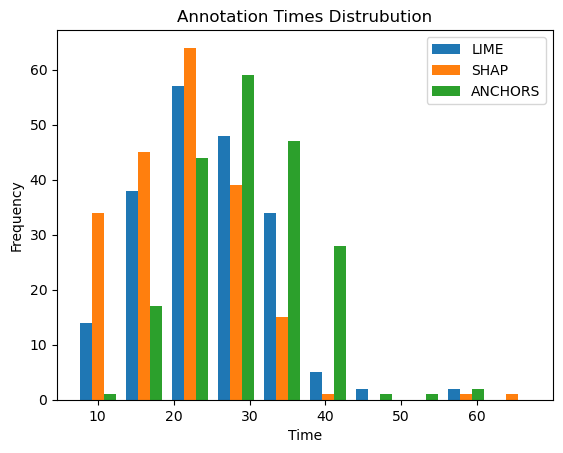

In [6]:
import matplotlib.pyplot as plt

# distrubution of annotation times
plt.hist([limeITRtimes, shapITRtimes, anchorsITRtimes])
plt.title('Annotation Times Distrubution')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.legend(['LIME', 'SHAP', 'ANCHORS'])
plt.show()

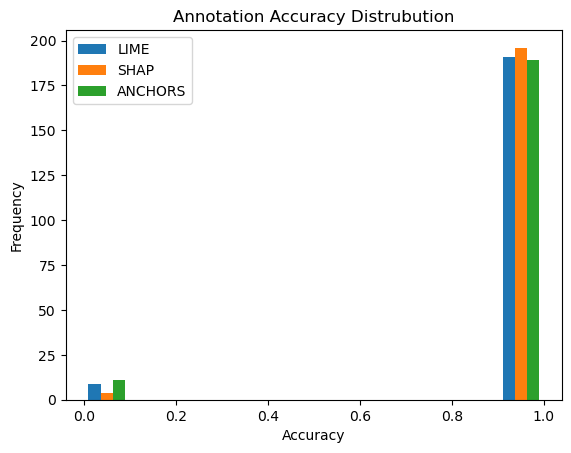

In [7]:
# distrubution of annotation accuracies
plt.hist([limeITRacc, shapITRacc, anchorsITRacc])
plt.title('Annotation Accuracy Distrubution')
plt.ylabel('Frequency')
plt.xlabel('Accuracy')
plt.legend(['LIME', 'SHAP', 'ANCHORS'])
plt.show()

In [8]:
# create column for annotation labels and true labels for LIMEITR01
limeITR01_values = data['limeITR01']
limeITR01_ann_labels = []

for i in limeITR01_values:
    if i == 1:
        i=1
    else:
        i=0
    limeITR01_ann_labels.append(i)
    
data['limeITR01_ann_labels'] = limeITR01_ann_labels
data['limeITR01_true_labels'] = [1] * 100

# create column for annotation labels and true labels for LIMEITR02
limeITR02_values = data['limeITR02']
limeITR02_ann_labels = []

for i in limeITR02_values:
    if i == 1:
        i=0
    else:
        i=1
    limeITR02_ann_labels.append(i)
    
data['limeITR02_ann_labels'] = limeITR02_ann_labels
data['limeITR02_true_labels'] = [0] * 100



# create column for annotation labels and true labels for SHAPITR01
shapITR01_values = data['shapITR01']
shapITR01_ann_labels = []

for i in shapITR01_values:
    if i == 1:
        i=1
    else:
        i=0
    shapITR01_ann_labels.append(i)
    
data['shapITR01_ann_labels'] = shapITR01_ann_labels
data['shapITR01_true_labels'] = [1] * 100

# create column for annotation labels and true labels for SHAPITR02
shapITR02_values = data['shapITR02']
shapITR02_ann_labels = []

for i in shapITR02_values:
    if i == 1:
        i=0
    else:
        i=1
    shapITR02_ann_labels.append(i)
    
data['shapITR02_ann_labels'] = shapITR02_ann_labels
data['shapITR02_true_labels'] = [0] * 100



# create column for annotation labels and true labels for ANCHORSITR01
anchorsITR01_values = data['anchorsITR01']
anchorsITR01_ann_labels = []

for i in anchorsITR01_values:
    if i == 1:
        i=0
    else:
        i=1
    anchorsITR01_ann_labels.append(i)
    
data['anchorsITR01_ann_labels'] = anchorsITR01_ann_labels
data['anchorsITR01_true_labels'] = [0] * 100

# create column for annotation labels and true labels for ANCHORSITR02
anchorsITR02_values = data['anchorsITR02']
anchorsITR02_ann_labels = []

for i in anchorsITR02_values:
    if i == 1:
        i=1
    else:
        i=0
    anchorsITR02_ann_labels.append(i)
    
data['anchorsITR02_ann_labels'] = anchorsITR02_ann_labels
data['anchorsITR02_true_labels'] = [1] * 100

In [9]:
lime_ann_labels = pd.concat([data['limeITR01_ann_labels'], data['limeITR02_ann_labels']])
lime_true_labels = pd.concat([data['limeITR01_true_labels'], data['limeITR02_true_labels']])

shap_ann_labels = pd.concat([data['shapITR01_ann_labels'], data['shapITR02_ann_labels']])
shap_true_labels = pd.concat([data['shapITR01_true_labels'], data['shapITR02_true_labels']])

anchors_ann_labels = pd.concat([data['anchorsITR01_ann_labels'], data['anchorsITR02_ann_labels']])
anchors_true_labels = pd.concat([data['anchorsITR01_true_labels'], data['anchorsITR02_true_labels']])

In [10]:
from sklearn.metrics import mutual_info_score

# calculate mutual information and ITR for LIME
lime_mi = mutual_info_score(lime_ann_labels, lime_true_labels, contingency=None)
lime_itr = lime_mi / limeITRtimes.mean()

# calculate mutual information and ITR for SHAP
shap_mi = mutual_info_score(shap_ann_labels, shap_true_labels, contingency=None)
shap_itr = shap_mi / shapITRtimes.mean()

# calculate mutual information and ITR for ANCHORS
anchors_mi = mutual_info_score(anchors_ann_labels, anchors_true_labels, contingency=None)
anchors_itr = anchors_mi / anchorsITRtimes.mean()

ITR_results = pd.DataFrame({
    'Method':['LIME', 'SHAP', 'ANCHORS'],
    'Mutual Information':[lime_mi, shap_mi, anchors_mi],
    'ITR (bits/s)':[lime_itr, shap_itr, anchors_itr]
})
ITR_results

,Method,Mutual Information,ITR (bits/s)
0,LIME,0.523310,0.021111
1,SHAP,0.597575,0.028172
2,ANCHORS,0.485141,0.016443


In [11]:
from math import sqrt
from scipy import stats
from scipy.stats import t

# function for calculating the t-statistic for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = data1.mean(), data2.mean()
    # calculate sample standard deviations
    std1, std2 = data1.std(), data2.std()
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

alpha = 0.01
t_stat, df, cv, p = independent_ttest(limeITRtimes, shapITRtimes, alpha)
print('t-test (LIME and SHAP) times:')
print('t=%.3f, df=%d, cv=%.3f, p=%s' % (t_stat, df, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    

t_stat, df, cv, p = independent_ttest(limeITRtimes, anchorsITRtimes, alpha)
print('\nt-test (LIME and ANCHORS) times:')
print('t=%.3f, df=%d, cv=%.3f, p=%s' % (t_stat, df, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    

t_stat, df, cv, p = independent_ttest(shapITRtimes, anchorsITRtimes, alpha)
print('\nt-test (SHAP and ANCHORS) times:')
print('t=%.3f, df=%d, cv=%.3f, p=%s' % (t_stat, df, cv, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t-test (LIME and SHAP) times:
t=4.329, df=398, cv=2.336, p=1.8968100810701216e-05
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.

t-test (LIME and ANCHORS) times:
t=-5.900, df=398, cv=2.336, p=7.78412378998894e-09
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.

t-test (SHAP and ANCHORS) times:
t=-10.288, df=398, cv=2.336, p=0.0
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [12]:
# Welch's t-test for annotation times - using scipy libraries to confirm above results
# Scipy library method does not provide df and cv values. 
t, p = stats.ttest_ind(limeITRtimes, shapITRtimes, equal_var=False)
print('t-test (LIME and SHAP) times:')
print('t=%.3f, p=%s' % (t, p))

t, p = stats.ttest_ind(limeITRtimes, anchorsITRtimes, equal_var=False)
print('\nt-test (LIME and ANCHORS) times:')
print('t=%.3f, p=%s' % (t, p))

t, p = stats.ttest_ind(shapITRtimes, anchorsITRtimes, equal_var=False)
print('\nt-test (SHAP and ANCHORS) times:')
print('t=%.3f, p=%s' % (t, p))

t-test (LIME and SHAP) times:
t=4.329, p=1.8969201454467465e-05

t-test (LIME and ANCHORS) times:
t=-5.900, p=7.79905212107353e-09

t-test (SHAP and ANCHORS) times:
t=-10.288, p=3.6907437621819083e-22


In [13]:
# Welch's t-test for annotation accuracies - using scipy libraries
t, p = stats.ttest_ind(limeITRacc, shapITRacc, equal_var=False)
print('t-test (LIME and SHAP) acc:')
print('t=%.3f, p=%.3f' % (t, p))

t, p = stats.ttest_ind(limeITRacc, anchorsITRacc, equal_var=False)
print('\nt-test (LIME and ANCHORS) acc:')
print('t=%.3f, p=%.3f' % (t, p))

t, p = stats.ttest_ind(shapITRacc, anchorsITRacc, equal_var=False)
print('\nt-test (SHAP and ANCHORS) acc:')
print('t=%.3f, p=%.3f' % (t, p))

t-test (LIME and SHAP) acc:
t=-1.410, p=0.159

t-test (LIME and ANCHORS) acc:
t=0.458, p=0.647

t-test (SHAP and ANCHORS) acc:
t=1.845, p=0.066


In [14]:
from scipy.stats import friedmanchisquare

# sign test (friedman test)
stat, p = friedmanchisquare(limeITRtimes, shapITRtimes, anchorsITRtimes)
print('statistics=%.2f, p=%s' % (stat, p))
alpha = 0.01
if p > alpha:
    print('Same distrubutions (fail to reject H0)')
else:
    print('Different distrubutions (reject H0)')

statistics=78.52, p=8.90427656181895e-18
Different distrubutions (reject H0)
